In [3]:
import os
from pathlib import Path

# Set working directory to Downloads
downloads_path = Path.home() / "Downloads"
os.chdir(downloads_path)

In [4]:
# Confirm it worked
print("Now in:", os.getcwd())

Now in: /Users/rohithr/Downloads


In [5]:
!pip install pandas

In [6]:
!pip install pandas

In [7]:
!pip install numpy

In [8]:
!pip install matplotlib

In [9]:
!pip install statsmodels

In [10]:
!pip install seaborn

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as sm


In [15]:
# Load CSV
df = pd.read_csv("Tesla Stock Price.csv")  # Update with actual path

# Parse Date column (MM/DD/YY → YYYY-MM-DD)
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%y')

# Set Date as index
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

# Check structure
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2020-08-01 to 2025-07-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Price   60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes
None
             Price
Date              
2020-08-01  166.11
2020-09-01  143.00
2020-10-01  129.35
2020-11-01  189.20
2020-12-01  235.22


/var/folders/p4/7k7s59gs6fbb4fdxvxmp_0lc0000gn/T/ipykernel_2482/1050240773.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Price'].interpolate(method='linear', inplace=True)


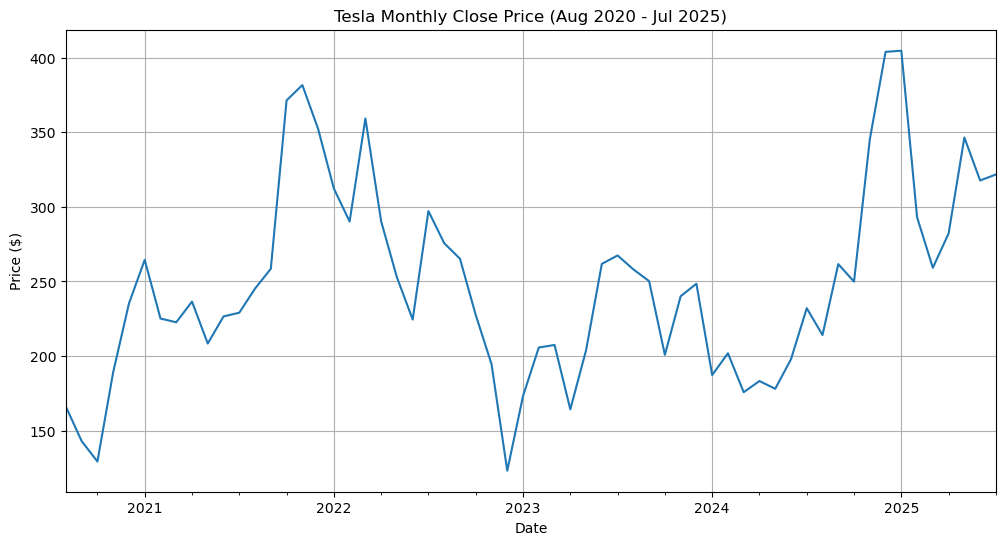

In [16]:
# Interpolate any missing prices
df['Price'].interpolate(method='linear', inplace=True)

# Plot
plt.figure(figsize=(12, 6))
df['Price'].plot(title="Tesla Monthly Close Price (Aug 2020 - Jul 2025)")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

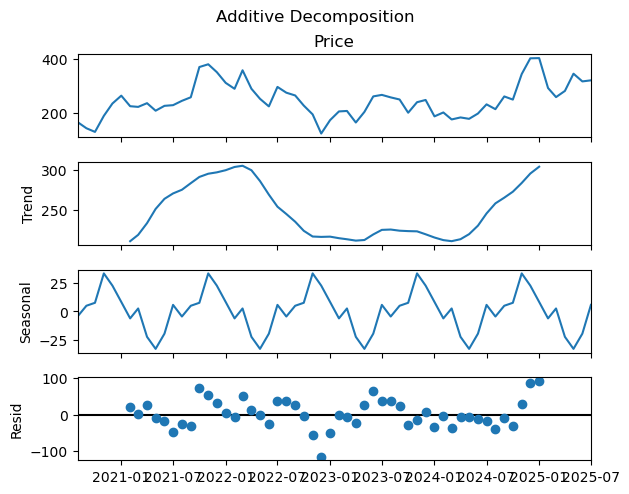

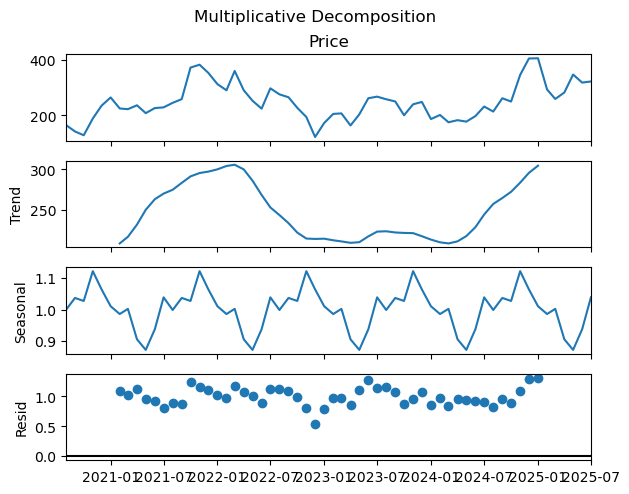

In [17]:
# Additive
add = seasonal_decompose(df['Price'], model='additive', period=12)
add.plot()
plt.suptitle("Additive Decomposition", y=1.02)
plt.show()

# Multiplicative
mult = seasonal_decompose(df['Price'], model='multiplicative', period=12)
mult.plot()
plt.suptitle("Multiplicative Decomposition", y=1.02)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


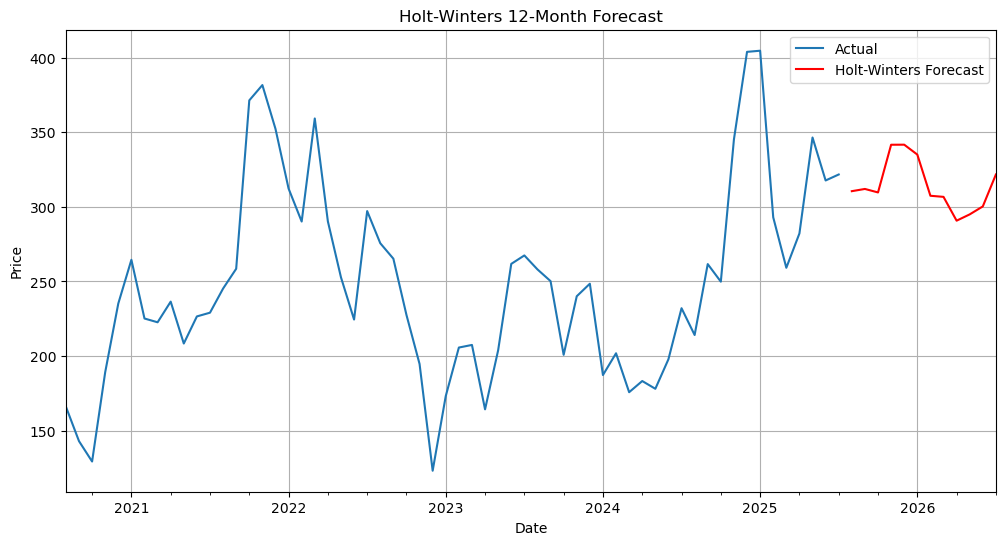

In [18]:
hw_model = ExponentialSmoothing(df['Price'], seasonal='add', seasonal_periods=12).fit()
hw_forecast = hw_model.forecast(12)

# Plot
plt.figure(figsize=(12, 6))
df['Price'].plot(label='Actual')
hw_forecast.plot(label='Holt-Winters Forecast', color='red')
plt.title("Holt-Winters 12-Month Forecast")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.show()

/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA 

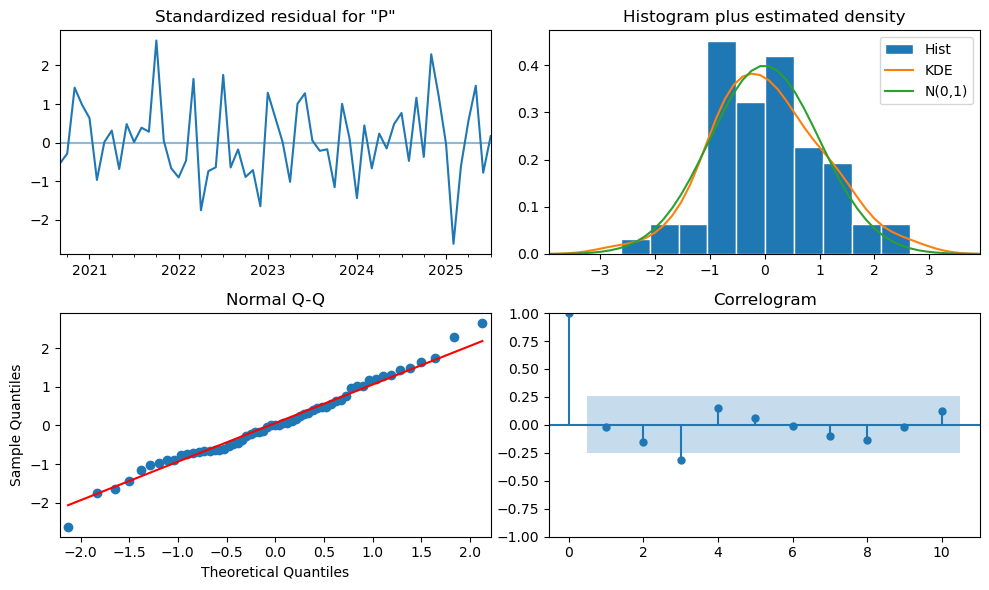

ARIMA 3-Month Forecast:
 2025-08-01    322.702060
2025-09-01    322.529569
2025-10-01    322.558398
Freq: MS, Name: predicted_mean, dtype: float64
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.35250D+00    |proj g|=  2.79678D-01

At iterate    5    f=  4.25924D+00    |proj g|=  2.35619D-02

At iterate   10    f=  4.25626D+00    |proj g|=  2.99996D-03

At iterate   15    f=  4.24326D+00    |proj g|=  1.65632D-02



/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning

At iterate   20    f=  4.23877D+00    |proj g|=  5.33798D-03

At iterate   25    f=  4.23798D+00    |proj g|=  7.33681D-03

At iterate   30    f=  4.23750D+00    |proj g|=  1.32670D-03

At iterate   35    f=  4.23744D+00    |proj g|=  1.63739D-04

At iterate   40    f=  4.23743D+00    |proj g|=  1.09609D-04

At iterate   45    f=  4.23743D+00    |proj g|=  6.55047D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     48     57      1     0     0   1.729D-06   4.237D+00
  F =   4.2374256845875697     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            


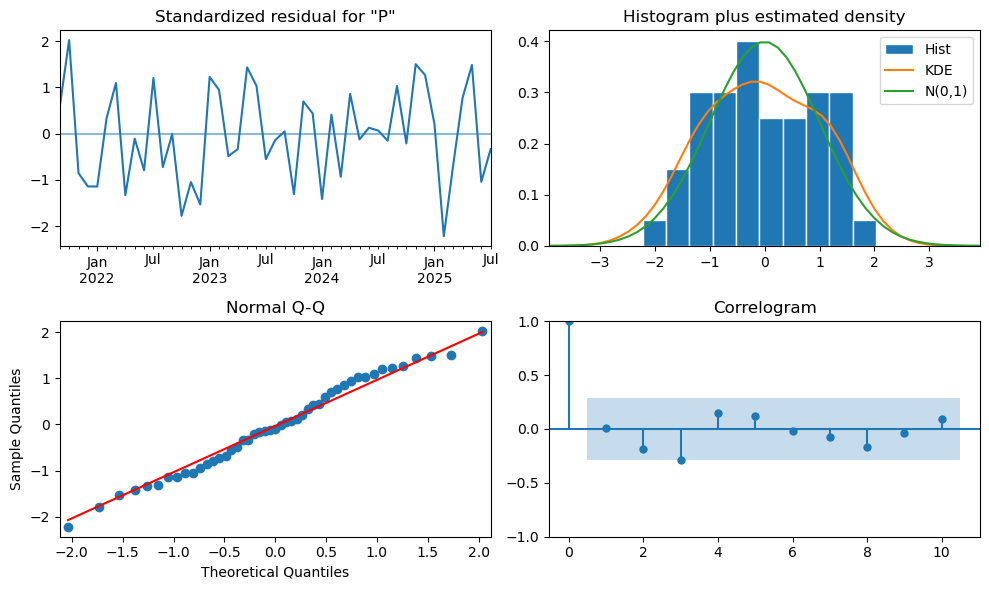

SARIMA 3-Month Forecast:
 2025-08-01    319.117462
2025-09-01    319.709562
2025-10-01    324.221200
Freq: MS, Name: predicted_mean, dtype: float64


In [19]:
# ARIMA
arima_model = ARIMA(df['Price'], order=(1, 1, 1)).fit()
arima_model.plot_diagnostics(figsize=(10, 6))
plt.tight_layout()
plt.show()

arima_forecast = arima_model.forecast(steps=3)
print("ARIMA 3-Month Forecast:\n", arima_forecast)

# SARIMA
sarima_model = sm.tsa.SARIMAX(df['Price'], order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()
sarima_model.plot_diagnostics(figsize=(10, 6))
plt.tight_layout()
plt.show()

sarima_forecast = sarima_model.forecast(steps=3)
print("SARIMA 3-Month Forecast:\n", sarima_forecast)